In [1]:
# importing necessary libraries

import time
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing
from sympy import Symbol 
from mpl_toolkits import mplot3d
from simple_colors import *

In [2]:
# Setting up the given or known values
c = 299792.458
ro = 26570 
d = 0.0001

# setting up empty arrays for phi, theta, A, B, C, R, and t to fill them later after calculation
phi = np.zeros(8)
theta = np.zeros(8)
A = np.zeros(8)
B = np.zeros(8)
C = np.zeros(8)
R = np.zeros(8)
t = np.zeros(8)

# setting up for loop for calculating phi, theta, and corresponding array of A, B, C, R, and t
for i in range(1,9):
    phi[i-1] = (i*np.pi)/16
    theta[i-1] = ((i-1)*np.pi)/4
    A[i-1] = ro*np.cos(phi[i-1])*np.cos(theta[i-1])
    B[i-1] = ro*np.cos(phi[i-1])*np.sin(theta[i-1]) 
    C[i-1] = ro*np.sin(phi[i-1])
    R[i-1] = np.sqrt(A[i-1]**2 + B[i-1]**2 + (C[i-1]-6370)**2)
    t[i-1] = d + R[i-1]/c 

In [3]:
# writing Gauss Newton to solve for x,y,z,d


def mulnew(x0, f, jac, tol, maxit = 100):
    for it in range(maxit):
        fvec = f(x0)
        j = jac(x0)
        QR = np.linalg.qr(j, mode='complete')
        a = QR[1]
        b = QR[0].transpose().dot(fvec)
        xnew = x0 - np.linalg.lstsq(a, b, rcond=None)[0]
        if np.sqrt(np.linalg.norm(xnew-x0)/len(fvec)) <= tol:
            norm = np.linalg.norm(xnew[0:3],np.inf)
            print(blue('The solution to the system is=',['bold','bright']),xnew, blue('at iteration no.=',['bold']),it)
            print(blue('The norm is=','bold'), norm)
            return xnew, it
        x0 = xnew
        if it == maxit-1:
            print ('warning, no convergence in', maxit, 'iterations')
            return xnew, it+1

# writing the vector of functions
def fnd(x):
    return np.array([(x[0]-A[0])**2 + (x[1]-B[0])**2 + (x[2]-C[0])**2 - (c*(t[0]-x[3]))**2,
                    (x[0]-A[1])**2 + (x[1]-B[1])**2 + (x[2]-C[1])**2 - (c*(t[1]-x[3]))**2,
                    (x[0]-A[2])**2 + (x[1]-B[2])**2 + (x[2]-C[2])**2 - (c*(t[2]-x[3]))**2,
                    (x[0]-A[3])**2 + (x[1]-B[3])**2 + (x[2]-C[3])**2 - (c*(t[3]-x[3]))**2,
                    (x[0]-A[4])**2 + (x[1]-B[4])**2 + (x[2]-C[4])**2 - (c*(t[4]-x[3]))**2,
                    (x[0]-A[5])**2 + (x[1]-B[5])**2 + (x[2]-C[5])**2 - (c*(t[5]-x[3]))**2,
                    (x[0]-A[6])**2 + (x[1]-B[6])**2 + (x[2]-C[6])**2 - (c*(t[6]-x[3]))**2,
                    (x[0]-A[7])**2 + (x[1]-B[7])**2 + (x[2]-C[7])**2 - (c*(t[7]-x[3]))**2])
    
    
    
    
# writing the vector of differentiated functions
def jac(x):
    return np.array([[2*(x[0]-A[0]), 2*(x[1]-B[0]), 2*(x[2]-C[0]), 2*c**2*(t[0]-x[3])],
                    [2*(x[0]-A[1]), 2*(x[1]-B[1]), 2*(x[2]-C[1]), 2*c**2*(t[1]-x[3])],
                    [2*(x[0]-A[2]), 2*(x[1]-B[2]), 2*(x[2]-C[2]), 2*c**2*(t[2]-x[3])],
                    [2*(x[0]-A[3]), 2*(x[1]-B[3]), 2*(x[2]-C[3]), 2*c**2*(t[3]-x[3])],
                    [2*(x[0]-A[4]), 2*(x[1]-B[4]), 2*(x[2]-C[4]), 2*c**2*(t[4]-x[3])],
                    [2*(x[0]-A[5]), 2*(x[1]-B[5]), 2*(x[2]-C[5]), 2*c**2*(t[5]-x[3])],
                    [2*(x[0]-A[6]), 2*(x[1]-B[6]), 2*(x[2]-C[6]), 2*c**2*(t[6]-x[3])],
                    [2*(x[0]-A[7]), 2*(x[1]-B[7]), 2*(x[2]-C[7]), 2*c**2*(t[7]-x[3])]])

# Initial solution in vector form and iterating the Newton-Raphson to solve for x,y,z, and d
x0 = np.array([0,0,6370,0])
x_sol, nit = mulnew(x0, fnd, jac, 1e-6,)

The solution to the system is= [2.85359262e-12 7.11034112e-13 6.37000000e+03 1.00000000e-04] at iteration no.= 4
The norm is= 6370.000000000001


<IPython.core.display.Javascript object>


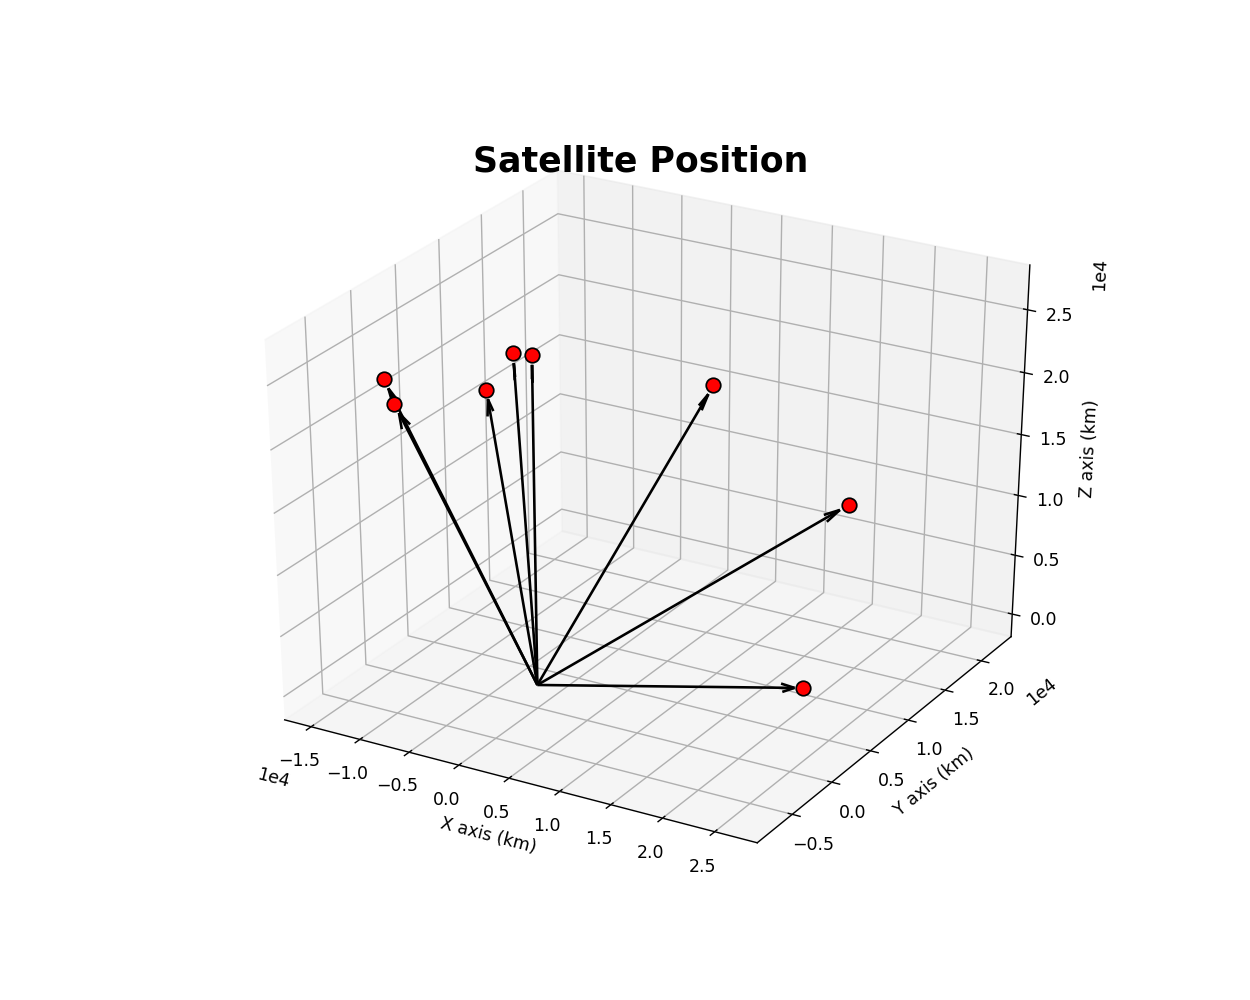

In [4]:
# plotting the coordinates of eight satellites

%matplotlib notebook
plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.set_facecolor('white')
ax.scatter(A, B, C, marker='o',s = 70, color = 'red', edgecolor='black', depthshade=False)
ax.set_title('Satellite Position',fontweight='bold', size=20)
ax.set_xlabel('X axis (km)')
ax.set_ylabel('Y axis (km)')
ax.set_zlabel('Z axis (km)')
ax.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
ax.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
ax.ticklabel_format(axis='z', style='sci',scilimits=(0,0))
start = [0,0,0]
ax.quiver(start[0],start[1],start[2],A[0],B[0],C[0],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[1],B[1],C[1],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[2],B[2],C[2],arrow_length_ratio=0.05,color='black',length=0.97)
ax.quiver(start[0],start[1],start[2],A[3],B[3],C[3],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[4],B[4],C[4],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[5],B[5],C[5],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[6],B[6],C[6],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[7],B[7],C[7],arrow_length_ratio=0.05, color='black', length=0.97)
plt.show()
plt.savefig('601.png', dpi = 400, bbox_inches='tight')

In [5]:
# creating function for new t array with added delta t
newt = np.zeros(8)
def fn(e1,e2,e3,e4,e5,e6,e7,e8):
    newt[0] = t[0] + e1
    newt[1] = t[1] + e2
    newt[2] = t[2] + e3
    newt[3] = t[3] + e4
    newt[4] = t[4] + e5
    newt[5] = t[5] + e5
    newt[6] = t[6] + e6
    newt[7] = t[7] + e7
    
    inperr = c*np.linalg.norm(t.reshape(8,1) - newt.reshape(8,1), np.inf)
    print(magenta('The input error=',['bold', 'bright']), inperr)

    
    # writing Gauss Newton to solve for x,y,z,d
    
    def mulnew(x0, f, jac, tol, maxit = 100):
        for it in range(maxit):
            fvec = f(x0)
            j = jac(x0)
            QR = np.linalg.qr(j, mode='complete')
            a = QR[1]
            b = QR[0].transpose().dot(fvec)
            xnew = x0 - np.linalg.lstsq(a, b, rcond=None)[0]
            if np.sqrt(np.linalg.norm(xnew-x0)/len(fvec)) <= tol:
                print(blue('The new solution of the equations: x,y,z,d=',['bold', 'bright']), xnew, blue('at iteration no.=',['bold']),it)
                return xnew, it
                
            x0 = xnew
            if it == maxit-1:
                print ('warning, no convergence in', maxit, 'iterations')
                return xnew, it+1
            
      
    


# writing the vector of functions
    def fnd(x):
        return np.array([(x[0]-A[0])**2 + (x[1]-B[0])**2 + (x[2]-C[0])**2 - (c*(newt[0]-x[3]))**2,
                    (x[0]-A[1])**2 + (x[1]-B[1])**2 + (x[2]-C[1])**2 - (c*(newt[1]-x[3]))**2,
                    (x[0]-A[2])**2 + (x[1]-B[2])**2 + (x[2]-C[2])**2 - (c*(newt[2]-x[3]))**2,
                    (x[0]-A[3])**2 + (x[1]-B[3])**2 + (x[2]-C[3])**2 - (c*(newt[3]-x[3]))**2,
                    (x[0]-A[4])**2 + (x[1]-B[4])**2 + (x[2]-C[4])**2 - (c*(newt[4]-x[3]))**2,
                    (x[0]-A[5])**2 + (x[1]-B[5])**2 + (x[2]-C[5])**2 - (c*(newt[5]-x[3]))**2,
                    (x[0]-A[6])**2 + (x[1]-B[6])**2 + (x[2]-C[6])**2 - (c*(newt[6]-x[3]))**2,
                    (x[0]-A[7])**2 + (x[1]-B[7])**2 + (x[2]-C[7])**2 - (c*(newt[7]-x[3]))**2])
    
    
    
    
# writing the vector of differentiated functions
    def jac(x):
        return np.array([[2*(x[0]-A[0]), 2*(x[1]-B[0]), 2*(x[2]-C[0]), 2*c**2*(newt[0]-x[3])],
                    [2*(x[0]-A[1]), 2*(x[1]-B[1]), 2*(x[2]-C[1]), 2*c**2*(newt[1]-x[3])],
                    [2*(x[0]-A[2]), 2*(x[1]-B[2]), 2*(x[2]-C[2]), 2*c**2*(newt[2]-x[3])],
                    [2*(x[0]-A[3]), 2*(x[1]-B[3]), 2*(x[2]-C[3]), 2*c**2*(newt[3]-x[3])],
                    [2*(x[0]-A[4]), 2*(x[1]-B[4]), 2*(x[2]-C[4]), 2*c**2*(newt[4]-x[3])],
                    [2*(x[0]-A[5]), 2*(x[1]-B[5]), 2*(x[2]-C[5]), 2*c**2*(newt[5]-x[3])],
                    [2*(x[0]-A[6]), 2*(x[1]-B[6]), 2*(x[2]-C[6]), 2*c**2*(newt[6]-x[3])],
                    [2*(x[0]-A[7]), 2*(x[1]-B[7]), 2*(x[2]-C[7]), 2*c**2*(newt[7]-x[3])]])

# Initial solution in vector form and iterating the Newton-Raphson to solve for x,y,z, and d
    x0 = np.array([0,0,6370,0])
    x_sol1, nit = mulnew(x0, fnd, jac, 1e-6,)
    

    

In [6]:
fn(10**(-8),10**(-8),10**(-8),-10**(-8),10**(-8),10**(-8),10**(-8),-10**(-8))
fn(10**(-8),10**(-8),-10**(-8),-10**(-8),10**(-8),10**(-8),-10**(-8),-10**(-8))
fn(10**(-8),-10**(-8),10**(-8),-10**(-8),10**(-8),-10**(-8),10**(-8),-10**(-8))
fn(10**(-8),-10**(-8),-10**(-8),-10**(-8),10**(-8),-10**(-8),-10**(-8),-10**(-8))

The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [-2.83893582e-03  5.15876275e-04  6.36999720e+03  1.00002403e-04] at iteration no.= 5
The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [-1.15217935e-04  5.18664395e-03  6.37000428e+03  1.00014211e-04] at iteration no.= 3
The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [1.38699705e-03 3.03089556e-03 6.37000331e+03 1.00010906e-04] at iteration no.= 3
The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [4.11071132e-03 7.70165995e-03 6.37001039e+03 1.00022713e-04] at iteration no.= 3


In [7]:
# calculating output error, and emf

inisol = np.array([2.85359262e-12,7.11034112e-13,6.37000000e+03])
pertsol = np.array([[-2.83893582e-03,  5.15876275e-04,  6.36999720e+03],
                   [-1.15217935e-04 , 5.18664395e-03,  6.37000428e+03],
                    [1.38699705e-03 ,3.03089556e-03, 6.37000331e+03],
                    [4.11071132e-03 ,7.70165995e-03, 6.37001039e+03]])
res = pertsol.transpose()
for i in range(0,4):
    inperr = 0.0029979245784220246
    print(blue('The input error is=',['bold','bright']),inperr)
    outerr = np.array([np.linalg.norm(inisol.transpose()-res[:,i],np.inf)])
    print(blue('The output error is=',['bold','bright']),outerr)
    emf = outerr/inperr
    print(blue('The error magnification factor is=',['bold','bright']),emf)
    print()

    


The input error is= 0.0029979245784220246
The output error is= [0.00283894]
The error magnification factor is= [0.94696706]

The input error is= 0.0029979245784220246
The output error is= [0.00518664]
The error magnification factor is= [1.7300782]

The input error is= 0.0029979245784220246
The output error is= [0.00331]
The error magnification factor is= [1.10409716]

The input error is= 0.0029979245784220246
The output error is= [0.01039]
The error magnification factor is= [3.46573095]



### Checking other combinations of signs for $\Delta t_i's$

In [8]:
fn(-10**(-8),-10**(-8),-10**(-8),10**(-8),-10**(-8),-10**(-8),-10**(-8),10**(-8))
fn(-10**(-8),-10**(-8),10**(-8),10**(-8),-10**(-8),-10**(-8),10**(-8),10**(-8))
fn(-10**(-8),10**(-8),-10**(-8),10**(-8),-10**(-8),10**(-8),-10**(-8),10**(-8))
fn(-10**(-8),10**(-8),10**(-8),10**(-8),-10**(-8),10**(-8),10**(-8),10**(-8))

The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [ 2.83893772e-03 -5.15874756e-04  6.37000280e+03  9.99975966e-05] at iteration no.= 3
The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [ 1.15220664e-04 -5.18664339e-03  6.36999572e+03  9.99857894e-05] at iteration no.= 3
The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [-1.38699230e-03 -3.03089170e-03  6.36999669e+03  9.99890944e-05] at iteration no.= 3
The input error= 0.0029979245784220246
The new solution of the equations: x,y,z,d= [-4.11071298e-03 -7.70166363e-03  6.36998961e+03  9.99772872e-05] at iteration no.= 3


In [9]:
# calculating output error, and emf

inisol = np.array([2.85359262e-12,7.11034112e-13,6.37000000e+03])
pertsol = np.array([[2.83893772e-03,  -5.15874756e-04,  6.37000280e+03],
                   [1.15220664e-04 , -5.18664339e-03,  6.36999572e+03],
                    [-1.38699230e-03 ,-3.03089170e-03, 6.36999669e+03],
                    [-4.11071298e-03 ,-7.70166363e-03, 6.36998961e+03]])
res = pertsol.transpose()
for i in range(0,4):
    inperr = 0.0029979245784220246
    print(blue('The input error is=',['bold','bright']),inperr)
    outerr = np.array([np.linalg.norm(inisol.transpose()-res[:,i],np.inf)])
    print(blue('The output error is=',['bold','bright']),outerr)
    emf = outerr/inperr
    print(blue('The error magnification factor is=',['bold','bright']),emf)
    print()


The input error is= 0.0029979245784220246
The output error is= [0.00283894]
The error magnification factor is= [0.94696769]

The input error is= 0.0029979245784220246
The output error is= [0.00518664]
The error magnification factor is= [1.73007801]

The input error is= 0.0029979245784220246
The output error is= [0.00331]
The error magnification factor is= [1.10409716]

The input error is= 0.0029979245784220246
The output error is= [0.01039]
The error magnification factor is= [3.46573095]

